In [332]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("./dataset/final_dataset.csv")
df

,booking_id,booking_date,booking_time,day_of_week,is_weekend,hour_of_day,city,pickup_location,drop_location,vehicle_type,ride_distance_km,estimated_ride_time_min,actual_ride_time_min,traffic_level,weather_condition,base_fare,surge_multiplier,booking_value,booking_status,incomplete_ride_reason,customer_id,driver_id,day,month,minutes,rush_hour_flag,fare_per_km,fare_per_min,long_distance_flag,customer_gender,customer_age,customer_city,customer_signup_days_ago,preferred_vehicle_type,customer_total_bookings,customer_completed_rides,customer_cancelled_rides,customer_incomplete_rides,customer_cancellation_rate,avg_customer_rating,customer_cancel_flag,driver_age,driver_city,driver_vehicle_type,driver_experience_years,total_assigned_rides,accepted_rides,driver_incomplete_rides,delay_count,acceptance_rate,delay_rate,avg_driver_rating,avg_pickup_delay_min,driver_delay_flag,total_requests,location_completed_rides,location_cancelled_rides,avg_wait_time_min,avg_surge_multiplier,demand_level
0,B_000001,2025-12-11,1900-01-01 00:07:00,Thursday,0,0,Mumbai,Loc_19,Loc_16,Bike,7.01,46.30,0.00,High,Heavy Rain,76.12,2.0,148.22,Cancelled,Unknown,C_005097,D_004592,11,12,7,0,21.144080,3.201296,0,Male,60,Chennai,548,Bike,16,13,3,0,0.187500,4.3,0,52,Chennai,Cab,10,18,16,2,1,0.89,0.06,4.9,2.9,0,4,3,1,51.002500,1.525000,Low
1,B_000002,2025-07-07,1900-01-01 06:13:00,Monday,0,6,Mumbai,Loc_32,Loc_38,Cab,9.67,43.54,42.28,Medium,Heavy Rain,254.15,1.8,465.85,Completed,Not Applicable,C_008459,D_000148,7,7,13,0,48.174767,10.699357,0,Female,26,Chennai,848,Cab,10,10,0,0,0.000000,4.7,0,32,Mumbai,Auto,5,18,14,2,1,0.78,0.06,4.6,3.9,0,4,4,0,47.202500,1.575000,Low
2,B_000003,2025-08-23,1900-01-01 08:53:00,Saturday,1,8,Chennai,Loc_28,Loc_1,Auto,16.18,48.55,0.00,Low,Heavy Rain,234.20,1.9,457.03,Cancelled,Unknown,C_003471,D_004976,23,8,53,0,28.246601,9.413594,1,Female,55,Bangalore,161,Cab,6,2,3,1,0.500000,3.7,1,38,Mumbai,Cab,14,27,22,4,4,0.81,0.15,4.4,5.2,1,7,4,3,68.342857,1.685714,Medium
3,B_000004,2025-04-12,1900-01-01 10:25:00,Saturday,1,10,Delhi,Loc_16,Loc_30,Bike,1.02,4.61,4.76,Medium,Rain,28.20,1.8,51.03,Completed,Not Applicable,C_002161,D_001173,12,4,25,0,50.029412,11.069414,0,Female,36,Hyderabad,322,Cab,11,8,2,1,0.181818,3.7,0,45,Delhi,Cab,14,25,17,3,2,0.68,0.08,4.2,3.2,0,3,2,1,27.963333,1.566667,Low
4,B_000005,2025-08-23,1900-01-01 00:08:00,Saturday,1,0,Hyderabad,Loc_22,Loc_31,Bike,12.35,55.56,64.53,Medium,Clear,118.77,1.2,144.73,Completed,Not Applicable,C_005617,D_001175,23,8,8,0,11.719028,2.604932,0,Male,30,Delhi,855,Cab,13,11,0,2,0.000000,4.4,0,54,Delhi,Auto,4,15,12,1,1,0.80,0.07,4.5,4.0,0,8,7,1,91.583750,1.400000,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,B_099996,2025-02-09,1900-01-01 07:32:00,Sunday,1,7,Chennai,Loc_27,Loc_10,Auto,12.32,55.42,59.31,Medium,Rain,187.79,1.5,292.05,Completed,Not Applicable,C_006714,D_004332,9,2,32,0,23.705357,5.269758,0,Female,64,Delhi,507,Cab,13,7,5,1,0.384615,4.1,1,34,Hyderabad,Cab,6,17,15,0,0,0.88,0.00,4.1,2.0,0,8,4,4,78.031250,1.687500,Medium
99996,B_099997,2025-06-02,1900-01-01 08:45:00,Monday,0,8,Mumbai,Loc_43,Loc_2,Auto,9.58,63.25,75.22,High,Rain,155.00,2.0,300.66,Completed,Not Applicable,C_002615,D_002143,2,6,45,1,31.384134,4.753518,0,Female,25,Bangalore,348,Cab,12,8,4,0,0.333333,3.6,1,38,Delhi,Cab,9,23,19,1,1,0.83,0.04,4.6,1.6,0,7,7,0,84.765714,1.857143,Medium
99997,B_099998,2025-08-20,1900-01-01 03:36:00,Wednesday,0,3,Bangalore,Loc_20,Loc_38,Auto,7.57,34.06,31.32,Medium,Heavy Rain,130.84,1.8,241.33,Completed,Not Applicable,C_002709,D_002794,20,8,36,0,31.879789,7.085437,0,Male,38,Delhi,845,Bike,12,7,3,2,0.250000,4.7,1,33,Hyderabad,Auto,7,24,20,5,3,0.83,0.12,4.4,2.8,1,6,5,1,57.021667,1.733333,Medium
99998,B_099999,2025-07-30,1900-01-01 23:04:00,Wednesday,0,23,Hyderabad,Loc_5,Loc_3,Cab,22.87,150.95,174.40,High,Cle

In [333]:
df["booking_status"] = df["booking_status"].map({'Cancelled': 0, 'Completed': 1, 'Incomplete': 2})
df["booking_status"].value_counts()

booking_status
1    68346
0    23284
2     8370
Name: count, dtype: int64

<h1><b>Splitting train-test data to prevent data leakage</b></h1>

In [334]:
y = df["booking_status"]
x = df.drop(columns=["booking_status", "booking_id", "booking_date", "booking_time", "actual_ride_time_min", "incomplete_ride_reason", "customer_id", "driver_id"])

In [335]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,day_of_week,is_weekend,hour_of_day,city,pickup_location,drop_location,vehicle_type,ride_distance_km,estimated_ride_time_min,traffic_level,weather_condition,base_fare,surge_multiplier,booking_value,day,month,minutes,rush_hour_flag,fare_per_km,fare_per_min,long_distance_flag,customer_gender,customer_age,customer_city,customer_signup_days_ago,preferred_vehicle_type,customer_total_bookings,customer_completed_rides,customer_cancelled_rides,customer_incomplete_rides,customer_cancellation_rate,avg_customer_rating,customer_cancel_flag,driver_age,driver_city,driver_vehicle_type,driver_experience_years,total_assigned_rides,accepted_rides,driver_incomplete_rides,delay_count,acceptance_rate,delay_rate,avg_driver_rating,avg_pickup_delay_min,driver_delay_flag,total_requests,location_completed_rides,location_cancelled_rides,avg_wait_time_min,avg_surge_multiplier,demand_level
39051,Saturday,1,2,Hyderabad,Loc_40,Loc_32,Auto,19.13,126.25,High,Heavy Rain,269.54,2.0,558.52,18,1,23,0,29.196027,4.423921,1,Female,49,Hyderabad,438,Auto,10,6,4,0,0.400000,4.5,1,53,Bangalore,Cab,12,24,16,2,1,0.67,0.04,4.6,3.6,0,5,5,0,65.612000,1.320000,Low
4980,Tuesday,0,15,Hyderabad,Loc_38,Loc_18,Cab,4.47,20.10,Medium,Rain,160.38,1.5,252.27,6,5,13,0,56.436242,12.550746,0,Male,23,Chennai,775,Bike,13,9,2,2,0.153846,3.6,0,46,Delhi,Auto,1,15,11,3,1,0.73,0.07,4.9,4.0,0,2,0,2,41.435000,1.650000,Low
66618,Wednesday,0,23,Delhi,Loc_15,Loc_2,Bike,20.69,136.57,High,Clear,185.54,1.4,272.07,23,4,55,1,13.149831,1.992165,1,Male,37,Bangalore,862,Bike,11,7,4,0,0.363636,3.8,1,45,Mumbai,Bike,12,22,19,4,3,0.86,0.14,4.6,4.1,1,7,5,2,72.658571,1.557143,Medium
50305,Friday,0,9,Mumbai,Loc_38,Loc_36,Bike,18.67,123.22,High,Clear,169.36,1.7,296.39,6,6,27,0,15.875201,2.405373,1,Male,24,Chennai,337,Bike,13,7,5,1,0.384615,4.6,1,39,Hyderabad,Cab,5,29,21,0,0,0.72,0.00,4.9,1.0,0,6,4,1,72.211667,1.750000,Medium
46812,Tuesday,0,10,Delhi,Loc_2,Loc_28,Bike,19.13,126.29,High,Heavy Rain,173.08,2.3,411.24,9,9,36,0,21.497125,3.256315,1,Male,21,Delhi,733,Bike,8,4,3,1,0.375000,3.9,1,29,Chennai,Cab,3,22,18,2,2,0.82,0.09,4.8,4.4,0,5,1,3,59.880000,1.760000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25956,Saturday,1,21,Chennai,Loc_23,Loc_20,Bike,8.73,57.60,High,Clear,89.81,1.4,119.56,16,8,46,0,13.695304,2.075694,0,Male,49,Chennai,984,Auto,6,6,0,0,0.000000,4.6,0,22,Delhi,Bike,7,24,17,2,1,0.71,0.04,4.3,4.6,0,8,5,2,75.026250,1.412500,Medium
93429,Friday,0,9,Bangalore,Loc_1,Loc_13,Auto,12.19,54.84,Medium,Heavy Rain,186.24,2.1,402.80,12,12,18,0,33.043478,7.345004,0,Male,40,Bangalore,394,Cab,6,3,3,0,0.500000,3.7,1,39,Hyderabad,Cab,2,21,16,3,1,0.76,0.05,4.2,1.8,0,7,3,4,68.584286,2.071429,Medium
25519,Monday,0,17,Mumbai,Loc_39,Loc_16,Cab,14.09,92.99,High,Heavy Rain,333.61,2.3,739.97,8,12,53,0,52.517388,7.957522,0,Female,58,Delhi,760,Cab,14,9,4,1,0.285714,3.8,1,26,Bangalore,Auto,14,18,11,1,1,0.61,0.06,4.2,3.9,0,5,2,3,89.830000,2.080000,Low
83810,Friday,0,6,Chennai,Loc_12,Loc_9,Cab,12.15,54.67,Medium,Clear,298.67,1.2,350.57,10,10,22,0,28.853498,6.412475,0,Male,22,Delhi,520,Bike,5,4,1,0,0.200000,3.9,0,24,Mumbai,Cab,4,17,13,2,0,0.76,0.00,4.6,4.0,0,6,4,1,63.040000,1.500000,Medium


<h1><b>Encoding categorical features</b></h1>

In [336]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

string_columns = x_train.select_dtypes(include='object').columns

ordinal_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)

x_train[string_columns] = ordinal_enc.fit_transform(x_train[string_columns])
x_test[string_columns]  = ordinal_enc.transform(x_test[string_columns])

x_train.isna().sum()

day_of_week                   0
is_weekend                    0
hour_of_day                   0
city                          0
pickup_location               0
drop_location                 0
vehicle_type                  0
ride_distance_km              0
estimated_ride_time_min       0
traffic_level                 0
weather_condition             0
base_fare                     0
surge_multiplier              0
booking_value                 0
day                           0
month                         0
minutes                       0
rush_hour_flag                0
fare_per_km                   0
fare_per_min                  0
long_distance_flag            0
customer_gender               0
customer_age                  0
customer_city                 0
customer_signup_days_ago      0
preferred_vehicle_type        0
customer_total_bookings       0
customer_completed_rides      0
customer_cancelled_rides      0
customer_incomplete_rides     0
customer_cancellation_rate    0
avg_cust

<h1><b>Detecting and treating outliers</b></h1>

In [337]:
from utils import cap_outliers_iqr

continuous_cols = [
    "ride_distance_km",
    "estimated_ride_time_min",
    "base_fare",
    "surge_multiplier",
    "booking_value",
    "fare_per_km",
    "fare_per_min",
    "customer_age",
    "customer_signup_days_ago",
    "customer_total_bookings",
    "customer_completed_rides",
    "customer_cancelled_rides",
    "customer_incomplete_rides",
    "customer_cancellation_rate",
    "avg_customer_rating",
    "driver_age",
    "driver_experience_years",
    "total_assigned_rides",
    "accepted_rides",
    "driver_incomplete_rides",
    "delay_count",
    "acceptance_rate",
    "delay_rate",
    "avg_driver_rating",
    "avg_pickup_delay_min",
    "driver_delay_flag",
    "total_requests",
    "location_completed_rides",
    "location_cancelled_rides",
    "avg_wait_time_min",
    "avg_surge_multiplier"
]

x_train = cap_outliers_iqr(x_train, continuous_cols)
x_test  = cap_outliers_iqr(x_test, continuous_cols)

<h1><b>Selecting relevant features</b></h1>

Text(0.5, 1.0, 'Correlation Heatmap')

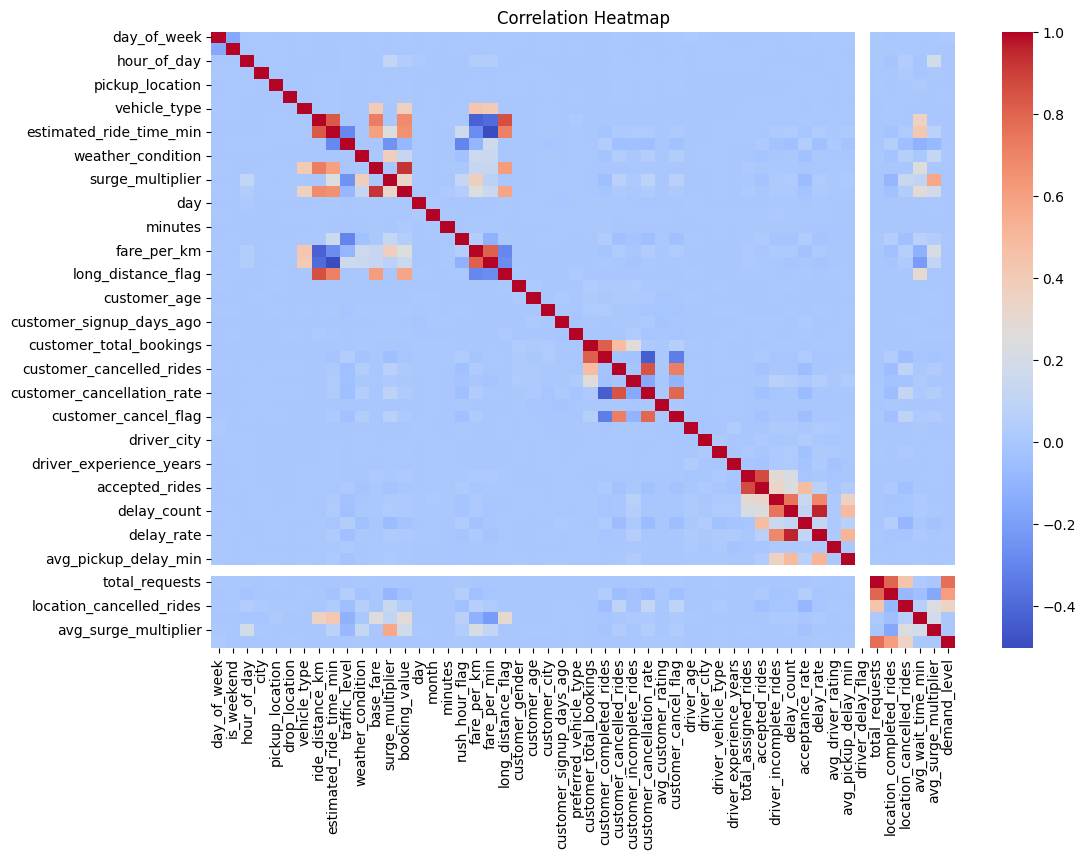

In [338]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix=x_train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")

In [339]:
threshold = 0.8
corr = x_train.corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

x_train_sel = x_train.drop(columns=to_drop)
x_test_sel = x_test.drop(columns=to_drop)

print(*to_drop)

estimated_ride_time_min booking_value fare_per_min long_distance_flag customer_completed_rides customer_cancellation_rate accepted_rides delay_rate


In [340]:
from imblearn.over_sampling import SMOTE
x_train_smote, y_train_smote = SMOTE().fit_resample(x_train_sel, y_train)

from imblearn.over_sampling import RandomOverSampler
x_train_over, y_train_over = RandomOverSampler().fit_resample(x_train_sel, y_train)

from imblearn.under_sampling import RandomUnderSampler
x_train_under , y_train_under = RandomUnderSampler().fit_resample(x_train_sel,y_train)

In [341]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weight_dict = dict(zip(classes, class_weights))

sample_weight_train = np.array([class_weight_dict[y] for y in y_train])
sample_weight_train

array([0.48872272, 1.42640635, 0.48872272, ..., 1.42640635, 0.48872272,
       0.48872272], shape=(80000,))

<h1><b>Selecting baseline Model</b></h1>

In [342]:
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
# class_weight_model = XGBClassifier(objective="multi:softprob", class_weight=class_weight_dict)

class_weight_model = xgb_model.fit(x_train_sel,y_train,sample_weight=sample_weight_train)
pred = class_weight_model.predict(x_test_sel)
print("----------class weight-----------")
print(classification_report(y_test,pred))

smote_model = xgb_model.fit(x_train_smote, y_train_smote)
pred = xgb_model.predict(x_test_sel)
print("----------Smote-----------")
print(classification_report(y_test, pred))

under_model = xgb_model.fit(x_train_under, y_train_under)
pred = xgb_model.predict(x_test_sel)
print("----------Under sampling-----------")
print(classification_report(y_test, pred))

over_model = xgb_model.fit(x_train_over, y_train_over)
pred = xgb_model.predict(x_test_sel)
print("----------over sampling-----------")
print(classification_report(y_test, pred))

----------class weight-----------
              precision    recall  f1-score   support

           0       0.59      0.78      0.67      4589
           1       0.93      0.75      0.83     13782
           2       0.48      0.85      0.62      1629

    accuracy                           0.76     20000
   macro avg       0.67      0.79      0.71     20000
weighted avg       0.82      0.76      0.78     20000

----------Smote-----------
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      4589
           1       0.86      0.89      0.88     13782
           2       0.68      0.58      0.63      1629

    accuracy                           0.81     20000
   macro avg       0.74      0.71      0.72     20000
weighted avg       0.81      0.81      0.81     20000

----------Under sampling-----------
              precision    recall  f1-score   support

           0       0.57      0.78      0.66      4589
           1       0.94      0.7

In [343]:
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(x_train_sel, y_train)
pred = xgb_model.predict(x_test_sel)
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      4589
           1       0.86      0.90      0.88     13782
           2       0.69      0.55      0.61      1629

    accuracy                           0.81     20000
   macro avg       0.75      0.70      0.72     20000
weighted avg       0.81      0.81      0.81     20000



array([[ 2946,  1506,   137],
       [ 1126, 12393,   263],
       [  213,   519,   897]])

In [344]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

models = {
    "xgb_classifier": XGBClassifier(),
    "gradient_boosting": GradientBoostingClassifier(),
    "random_forest": RandomForestClassifier(),
    "ada_boost": AdaBoostClassifier(),
    "decision_tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    model.fit(x_train_sel, y_train)
    pred = model.predict(x_test_sel)
    results[name] = [classification_report(y_test, pred), confusion_matrix(y_test, pred)]


for name, result in results.items():
    print("************************************************")
    print(f"Model Name: {name}")
    print(result[0])
    print(result[1])
    print("")


************************************************
Model Name: xgb_classifier
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      4589
           1       0.86      0.90      0.88     13782
           2       0.69      0.55      0.61      1629

    accuracy                           0.81     20000
   macro avg       0.75      0.70      0.72     20000
weighted avg       0.81      0.81      0.81     20000

[[ 2946  1506   137]
 [ 1126 12393   263]
 [  213   519   897]]

************************************************
Model Name: gradient_boosting
              precision    recall  f1-score   support

           0       0.70      0.64      0.67      4589
           1       0.84      0.91      0.88     13782
           2       0.73      0.38      0.50      1629

    accuracy                           0.81     20000
   macro avg       0.76      0.65      0.68     20000
weighted avg       0.80      0.81      0.80     20000

[[ 2937  1570    8

<h1><b>Hyper Parameter tuning</b></h1>

In [345]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.9, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),

        "objective": "multi:softprob",
        "eval_metric": "mlogloss",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBClassifier(**params)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    score = cross_val_score(
        model,
        x_train_smote,
        y_train_smote,
        cv=cv,
        scoring="f1_macro"
    ).mean()

    return score


In [346]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)

print("Best params:", study.best_params)
print("Best CV score:", study.best_value)


[I 2026-01-18 19:50:57,369] A new study created in memory with name: no-name-8cde512b-b511-4696-941d-1de8028f54e0
[I 2026-01-18 19:51:15,798] Trial 0 finished with value: 0.8605728139791982 and parameters: {'n_estimators': 704, 'learning_rate': 0.01574796297134893, 'max_depth': 3, 'min_child_weight': 8, 'subsample': 0.6169407681323564, 'colsample_bytree': 0.6753254178998849, 'gamma': 1.9878628199722237, 'reg_alpha': 3.7111011812849455, 'reg_lambda': 4.998655673947495}. Best is trial 0 with value: 0.8605728139791982.
[I 2026-01-18 19:51:27,693] Trial 1 finished with value: 0.8893474738057481 and parameters: {'n_estimators': 609, 'learning_rate': 0.17221244343947995, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.8439884021435676, 'colsample_bytree': 0.6140670523736738, 'gamma': 4.3311581362594955, 'reg_alpha': 1.5691400521770171, 'reg_lambda': 2.744333018775488}. Best is trial 1 with value: 0.8893474738057481.
[I 2026-01-18 19:51:35,414] Trial 2 finished with value: 0.88510669219

Best params: {'n_estimators': 798, 'learning_rate': 0.04514193655241745, 'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.7695654745926612, 'colsample_bytree': 0.723543356424883, 'gamma': 0.2582487179794237, 'reg_alpha': 0.0936152990632757, 'reg_lambda': 1.4007835302425373}
Best CV score: 0.9055038674122826


In [347]:
best_model = XGBClassifier(
    **study.best_params,
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

best_model.fit(x_train_smote, y_train_smote)
y_pred = best_model.predict(x_test_sel)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test,y_pred)


              precision    recall  f1-score   support

           0       0.69      0.63      0.66      4589
           1       0.85      0.90      0.88     13782
           2       0.69      0.54      0.61      1629

    accuracy                           0.81     20000
   macro avg       0.75      0.69      0.71     20000
weighted avg       0.80      0.81      0.81     20000



array([[ 2891,  1554,   144],
       [ 1108, 12424,   250],
       [  191,   554,   884]])